In [12]:
import numpy
import pandas as pd
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random
import sys
import os

In [13]:
sys.path.append("../continuous")
sys.path.append("../continuous/measurements")
from measurements import MEASUREMENTS_CONTINUOUS

In [14]:
mpl.style.use("ggplot")


In [15]:
from distributions.alpha import ALPHA
from distributions.arcsine import ARCSINE
from distributions.argus import ARGUS
from distributions.beta import BETA
from distributions.beta_prime import BETA_PRIME
from distributions.beta_prime_4p import BETA_PRIME_4P
from distributions.bradford import BRADFORD
from distributions.burr import BURR
from distributions.burr_4p import BURR_4P
from distributions.cauchy import CAUCHY
from distributions.chi_square import CHI_SQUARE
from distributions.chi_square_3p import CHI_SQUARE_3P
from distributions.dagum import DAGUM
from distributions.dagum_4p import DAGUM_4P
from distributions.erlang import ERLANG
from distributions.erlang_3p import ERLANG_3P
from distributions.error_function import ERROR_FUNCTION
from distributions.exponential import EXPONENTIAL
from distributions.exponential_2p import EXPONENTIAL_2P
from distributions.f import F
from distributions.fatigue_life import FATIGUE_LIFE
from distributions.folded_normal import FOLDED_NORMAL
from distributions.frechet import FRECHET
from distributions.f_4p import F_4P
from distributions.gamma import GAMMA
from distributions.gamma_3p import GAMMA_3P
from distributions.generalized_extreme_value import GENERALIZED_EXTREME_VALUE
from distributions.generalized_gamma import GENERALIZED_GAMMA
from distributions.generalized_gamma_4p import GENERALIZED_GAMMA_4P
from distributions.generalized_logistic import GENERALIZED_LOGISTIC
from distributions.generalized_normal import GENERALIZED_NORMAL
from distributions.generalized_pareto import GENERALIZED_PARETO
from distributions.gibrat import GIBRAT
from distributions.gumbel_left import GUMBEL_LEFT
from distributions.gumbel_right import GUMBEL_RIGHT
from distributions.half_normal import HALF_NORMAL
from distributions.hyperbolic_secant import HYPERBOLIC_SECANT
from distributions.inverse_gamma import INVERSE_GAMMA
from distributions.inverse_gamma_3p import INVERSE_GAMMA_3P
from distributions.inverse_gaussian import INVERSE_GAUSSIAN
from distributions.inverse_gaussian_3p import INVERSE_GAUSSIAN_3P
from distributions.johnson_sb import JOHNSON_SB
from distributions.johnson_su import JOHNSON_SU
from distributions.kumaraswamy import KUMARASWAMY
from distributions.laplace import LAPLACE
from distributions.levy import LEVY
from distributions.loggamma import LOGGAMMA
from distributions.logistic import LOGISTIC
from distributions.loglogistic import LOGLOGISTIC
from distributions.loglogistic_3p import LOGLOGISTIC_3P
from distributions.lognormal import LOGNORMAL
from distributions.maxwell import MAXWELL
from distributions.moyal import MOYAL
from distributions.nakagami import NAKAGAMI
from distributions.non_central_chi_square import NON_CENTRAL_CHI_SQUARE
from distributions.non_central_f import NON_CENTRAL_F
from distributions.non_central_t_student import NON_CENTRAL_T_STUDENT
from distributions.normal import NORMAL
from distributions.pareto_first_kind import PARETO_FIRST_KIND
from distributions.pareto_second_kind import PARETO_SECOND_KIND
from distributions.pert import PERT
from distributions.power_function import POWER_FUNCTION
from distributions.rayleigh import RAYLEIGH
from distributions.reciprocal import RECIPROCAL
from distributions.rice import RICE
from distributions.semicircular import SEMICIRCULAR
from distributions.trapezoidal import TRAPEZOIDAL
from distributions.triangular import TRIANGULAR
from distributions.t_student import T_STUDENT
from distributions.t_student_3p import T_STUDENT_3P
from distributions.uniform import UNIFORM
from distributions.weibull import WEIBULL
from distributions.weibull_3p import WEIBULL_3P


In [16]:
_all_distributions = [
    ALPHA,
    ARCSINE,
    ARGUS,
    BETA,
    BETA_PRIME,
    BETA_PRIME_4P,
    BRADFORD,
    BURR,
    BURR_4P,
    CAUCHY,
    CHI_SQUARE,
    CHI_SQUARE_3P,
    DAGUM,
    DAGUM_4P,
    ERLANG,
    ERLANG_3P,
    ERROR_FUNCTION,
    EXPONENTIAL,
    EXPONENTIAL_2P,
    F,
    FATIGUE_LIFE,
    FOLDED_NORMAL,
    FRECHET,
    F_4P,
    GAMMA,
    GAMMA_3P,
    GENERALIZED_EXTREME_VALUE,
    GENERALIZED_GAMMA,
    GENERALIZED_GAMMA_4P,
    GENERALIZED_LOGISTIC,
    GENERALIZED_NORMAL,
    GENERALIZED_PARETO,
    GIBRAT,
    GUMBEL_LEFT,
    GUMBEL_RIGHT,
    HALF_NORMAL,
    HYPERBOLIC_SECANT,
    INVERSE_GAMMA,
    INVERSE_GAMMA_3P,
    INVERSE_GAUSSIAN,
    INVERSE_GAUSSIAN_3P,
    JOHNSON_SB,
    JOHNSON_SU,
    KUMARASWAMY,
    LAPLACE,
    LEVY,
    LOGGAMMA,
    LOGISTIC,
    LOGLOGISTIC,
    LOGLOGISTIC_3P,
    LOGNORMAL,
    MAXWELL,
    MOYAL,
    NAKAGAMI,
    NON_CENTRAL_CHI_SQUARE,
    NON_CENTRAL_F,
    NON_CENTRAL_T_STUDENT,
    NORMAL,
    PARETO_FIRST_KIND,
    PARETO_SECOND_KIND,
    PERT,
    POWER_FUNCTION,
    RAYLEIGH,
    RECIPROCAL,
    RICE,
    SEMICIRCULAR,
    TRAPEZOIDAL,
    TRIANGULAR,
    T_STUDENT,
    T_STUDENT_3P,
    UNIFORM,
    WEIBULL,
    WEIBULL_3P,
]


In [17]:
path = "./data/data_alpha.txt"
sample_distribution_file = open(path, "r")
data = [float(x.replace(",", ".")) for x in sample_distribution_file.read().splitlines()]


In [18]:
measurements = MEASUREMENTS_CONTINUOUS(data)


In [19]:
## Calculae Histogram
num_bins = measurements.num_bins_doane()
frequencies, bin_edges = numpy.histogram(data, num_bins, density=True)
central_values = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]


In [20]:
results = {}
for distribution_class in _all_distributions:
    try:
        distribution = distribution_class(measurements)

        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c) for c in central_values]

        ## Calculate SSE (sum of squared estimate of errors)
        sse = numpy.sum(numpy.power(frequencies - pdf_values, 2.0))

        if not math.isnan(sse):
            results[distribution] = sse
    except:
        print(distribution_class.__name__)


BETA
GENERALIZED_GAMMA
INVERSE_GAUSSIAN_3P
NON_CENTRAL_CHI_SQUARE


In [21]:
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}

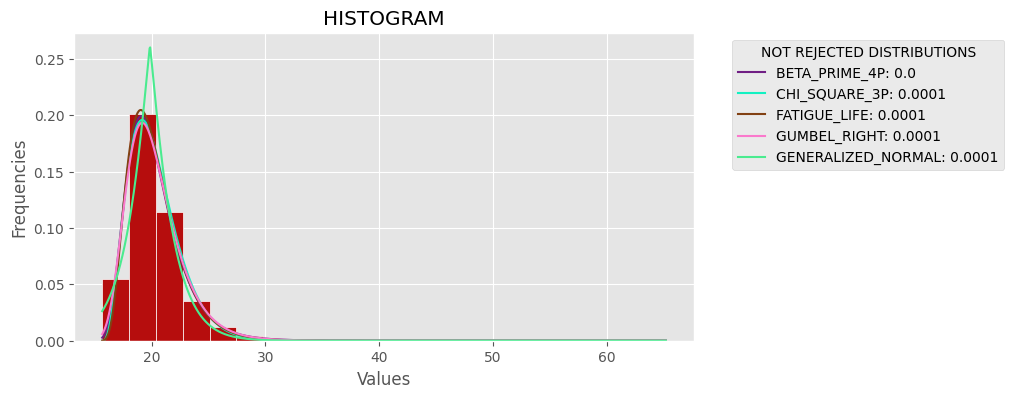

In [22]:
## Histogram of data
plt.figure(figsize=(8, 4))
plt.hist(data, bins=num_bins, density=True, ec="white", color=(168 / 235, 12 / 235, 12 / 235))
plt.title("HISTOGRAM")
plt.xlabel("Values")
plt.ylabel("Frequencies")

ll = min(data)
ul = max(data)
for distribution, sse in list(results.items())[:5]:
    if distribution.__class__.__name__ in [
        "LEVY",
        "CAUCHY",
        "FRECHET",
        "GENERALIZED_PARETO",
    ]:
        ll = min(data) - 10
        ul = max(data) + 10
    x_plot = numpy.linspace(ll, ul, 1000)
    y_plot = [distribution.pdf(x) for x in x_plot]
    label_d = distribution.__class__.__name__ + ": " + str(round(sse, 4))
    color_d = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
    plt.plot(x_plot, y_plot, label=label_d, color=color_d)

plt.legend(title="NOT REJECTED DISTRIBUTIONS", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
